FFR 120  
Felix Waldschock

HW 3 
Exercise 12.4
## Average path length and clustering coef ficient of Watts–Strogatz small-world graphs. 


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


In [77]:
# generate adjacency matrix
def generateWattStrogatz(n,p,c):
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1
        # do the nearest neighbour connections
        for b in range(c):
            A[i, (i + int(b) + 1) % n] = 1

    return A

# theoretical approximation for C for Watts Strogatz Networks

$ C = \frac{3(c-2)}{4(c-1)}$

In [78]:
# compute the average path length of matrix A
def computeAveragePathLength(A):
    n = A.shape[0]

    # copy A
    A_copy = np.copy(A)

    # compute the shortest path length between all pairs of nodes
    # initialize matrix with -1
    L = np.ones((n,n)) * (-1)

    # implement a copy of L where the diagonal is =-1 so that the while case can just check that none of the elements are -1
    B = np.copy(L)
    # B set diagonal to 0
    np.fill_diagonal(B, 0)

    # set increment t
    t = 1
    t_max = 200

    # create a History tensor H with 3 dimensions 
    H = np.zeros((n,n,t_max+1))

    while (np.any(B == -1)):
    #for b in range(5):
        for i in range(n):
            for j in range(n):
                if A[i,j] != 0:
                    if L[i,j] == L[j,i] == -1:
                        if i != j:
                            # if i != j, set L[i,j] = t+1
                            L[i,j] = t
                            L[j,i] = t
                            #print("Changed L[{},{}] to {}".format(i,j,t))
        # increase power of A
        A = np.matmul(A,A)
        # Update counter t
        # print("Updated t to {}".format(t))
        t += 1
        # Update B
        B = np.copy(L)
        np.fill_diagonal(B, 0)
        # print(t)
        # print(B)

        # push L to H
        H[:,:,t-1] = L

        # if t > 10, break
        if t > t_max:
            print("Breaking, t > 100")
            break
    print("Finished after T = {}".format(t))

    return L,H,A,A_copy

In [79]:
def plot_ErdosRenyi(A, ax, title):
    # Get the number of nodes
    n = A.shape[0]

    # Calculate the angular spacing for nodes on the circle
    dAngle = 2 * np.pi / n

    # Set the radius of the circle
    r = 1

    # Calculate the coordinates of nodes on the circle
    x = r * np.cos(np.linspace(0, 2 * np.pi, n+1))
    y = r * np.sin(np.linspace(0, 2 * np.pi, n+1))

    # Plot nodes as blue circles
    ax.plot(x, y, 'o', color='blue')

    # Plot edges according to the Adjacency matrix A
    for i in range(n):
        for j in range(n):
            if A[i, j] == 1:
                ax.plot([x[i], x[j]], [y[i], y[j]], color='red')
    ax.set_title(title)
    # scale axes equally
    ax.axis('equal')

    # Turn off axis for cleaner visualization
    ax.axis('off')

In [80]:
# Formula 12.3
def getClusteringCoefficient(A):
    A_2 = np.matmul(A,A)
    A_3 = np.matmul(A_2,A)
    # get the diagonal
    diag = np.diagonal(A_3)
    # get the sum of the diagonal
    sumDiag = np.sum(diag)              # Dimension: (1,1)

    # k_i is the degree of node i 
    k_i = np.sum(A, axis=0)             # Dimension: (n,1)
    # elementwise square of k_i
    k_i_2 = np.square(k_i)              # Dimension: (n,1)
    # sum of k_i_2
    sum_Triples = np.sum(k_i_2 - k_i)   # Dimension: (1,1)

    # get the number of nodes
    n = A.shape[0]

    # compute the clustering coefficient
    C = sumDiag / sum_Triples

    return C

In [81]:
# compute the average path length
def getAveragePathLength(L):
    # sum the matrix L and divide by the number of elements minus the diagonal
    n = L.shape[0]
    sum = np.sum(L)
    avg = sum / (n*n - n)
    return avg
    

In [82]:
def getClusteringCoefficientTheoretical(c):
    return (3*(c-2)/(4*(c-1)))

In [83]:
# parameters
n = 40
c = 4
p = np.logspace(-5, -3, 8)

In [84]:
# init the arrays to store network
A_ = np.zeros((n,n, len(p)))
L_ = np.zeros((n,n, len(p)))
C = np.zeros(len(p))

# Init the network and evaluate L and C
for i in range(len(p)):
    A_[:,:,i] = generateWattStrogatz(n, p[i], c)
    L_[:,:,i],_,_,_ = computeAveragePathLength(A_[:,:,i])
    C[i] = getClusteringCoefficient(A_[:,:,i])



# compute the average path length for each p
avg_path_length = np.zeros(len(p))
for i in range(len(p)):
    avg_path_length[i] = getAveragePathLength(L_[:,:,i])


Finished after T = 5
Finished after T = 5
Finished after T = 5
Finished after T = 5
Finished after T = 5
Finished after T = 5
Finished after T = 5
Finished after T = 5


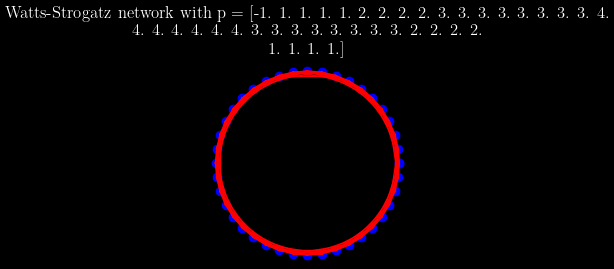

[[-1.  1.  1. ...  1.  1.  1.]
 [ 1. -1.  1. ...  1.  1.  1.]
 [ 1.  1. -1. ...  2.  1.  1.]
 ...
 [ 1.  1.  2. ... -1.  1.  1.]
 [ 1.  1.  1. ...  1. -1.  1.]
 [ 1.  1.  1. ...  1.  1. -1.]]


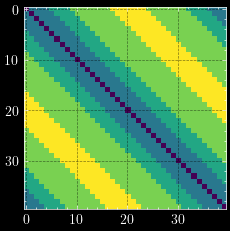

In [91]:
# plot the first A network
fig, ax = plt.subplots(1,1)
plot_ErdosRenyi(A_[:,:,0], ax, "Watts-Strogatz network with p = {}".format(p[0]))
plt.show()
p = ((L_[:,:,0]))
print(p)
plt.imshow(p)

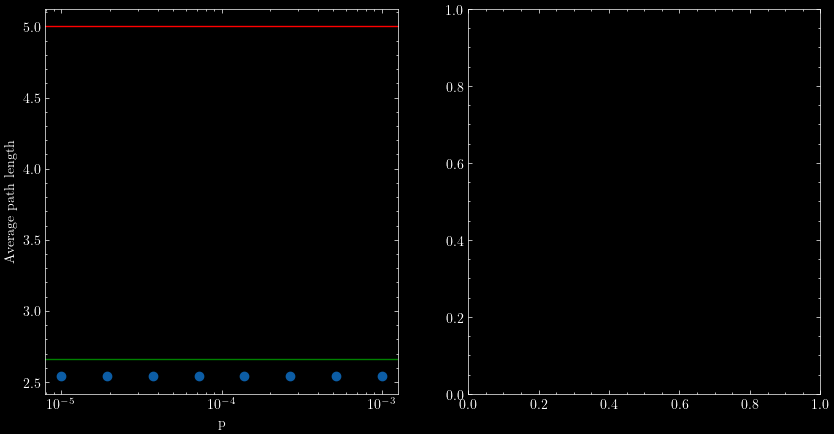

In [86]:
# plot the data in a 1x2 subplot
# left average length, right clustering coefficient

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].semilogx(p, avg_path_length, 'o', label="Numerical")
ax[0].set_xlabel("p")
ax[0].set_ylabel("Average path length")

# plot the boundaries at n/2c (eq. 12.6) and ln(n)/ln(c) (eq. 12.7) -> draw horizontal lines
ax[0].axhline(n/(2*c), label="n/2c", color="red")
ax[0].axhline(np.log(n)/np.log(c), label="ln(n)/ln(c)", color="green")


# # plot the numerical coefficients
# ax[1].plot(p, C, label="C")
# ax[1].set_xlabel("p")
# ax[1].set_ylabel("C")
# ax[1].set_xscale("log")
# ax[1].legend()

# # plot the theoretical coefficients
# ax[1].plot(p, p, label="p")



plt.show()